In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("kidney.csv")

In [2]:
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [4]:
df = df.rename({
    "gravity": "Gravity",
    "ph": "pH",
    "osmo": "Osmolarity",
    "cond": "Conductivity",
    "urea": "Urea Concentration",
    "calc": "Calcium Concentration",
    "target": "Target"
}, axis = 1)
df.head()

,Gravity,pH,Osmolarity,Conductivity,Urea Concentration,Calcium Concentration,Target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [5]:
df = df[df["Target"].notnull()]
df.head()

,Gravity,pH,Osmolarity,Conductivity,Urea Concentration,Calcium Concentration,Target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gravity                79 non-null     float64
 1   pH                     79 non-null     float64
 2   Osmolarity             79 non-null     int64  
 3   Conductivity           79 non-null     float64
 4   Urea Concentration     79 non-null     int64  
 5   Calcium Concentration  79 non-null     float64
 6   Target                 79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [7]:
df.isnull().sum()

Gravity                  0
pH                       0
Osmolarity               0
Conductivity             0
Urea Concentration       0
Calcium Concentration    0
Target                   0
dtype: int64

In [8]:
df['Target'].value_counts()

Target
0    45
1    34
Name: count, dtype: int64

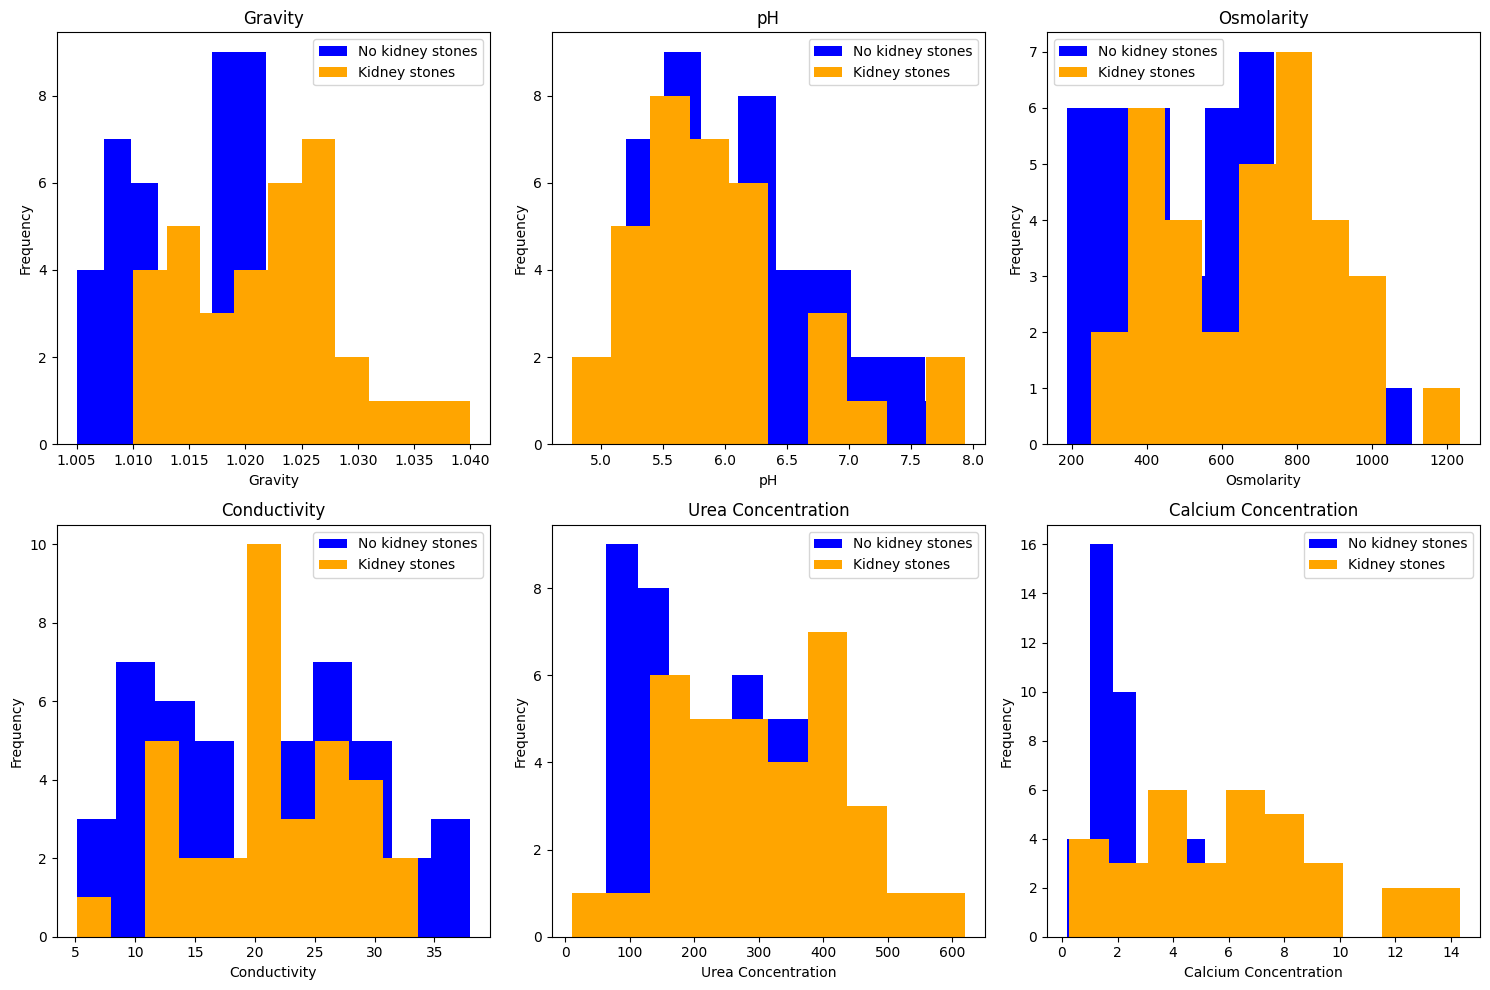

In [10]:
target_0 = df[df["Target"] == 0]
target_1 = df[df["Target"] == 1]

columns = ['Gravity', 'pH', 'Osmolarity', 'Conductivity', 'Urea Concentration', 'Calcium Concentration']

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flatten()

for i, col in enumerate(columns):
    axes[i].hist(target_0[col], bins = 10, label = "No kidney stones", color = "blue")
    axes[i].hist(target_1[col], bins = 10, label = "Kidney stones", color = "orange")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].legend()

plt.tight_layout()
plt.show()

In [13]:
X = df.drop("Target", axis = 1)
y = df["Target"]

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.67      0.55      0.60        11

    accuracy                           0.70        27
   macro avg       0.69      0.68      0.68        27
weighted avg       0.70      0.70      0.70        27

[[13  3]
 [ 5  6]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.5925925925925926
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        16
           1       0.50      0.45      0.48        11

    accuracy                           0.59        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.59      0.59      0.59        27



In [45]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.71      0.45      0.56        11

    accuracy                           0.70        27
   macro avg       0.71      0.66      0.67        27
weighted avg       0.71      0.70      0.69        27



In [46]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.70      0.64      0.67        11

    accuracy                           0.74        27
   macro avg       0.73      0.72      0.73        27
weighted avg       0.74      0.74      0.74        27



In [50]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)
forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.67      0.55      0.60        11

    accuracy                           0.70        27
   macro avg       0.69      0.68      0.68        27
weighted avg       0.70      0.70      0.70        27



In [51]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Accuracy: 0.7037037037037037
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        16
           1       0.67      0.55      0.60        11

    accuracy                           0.70        27
   macro avg       0.69      0.68      0.68        27
weighted avg       0.70      0.70      0.70        27



In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0, max_depth = 1, random_state = 42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.73      0.73      0.73        11

    accuracy                           0.78        27
   macro avg       0.77      0.77      0.77        27
weighted avg       0.78      0.78      0.78        27



In [73]:
X = np.array([[1.02, 4.91, 725, 14.0, 443, 2.45]])

In [74]:
y_pred = gb.predict(X)
y_pred

d:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [76]:
import pickle

In [77]:
data  = {"model": gb}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [78]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]

In [80]:
y_pred = regressor_loaded.predict(X)
y_pred

d:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)